# Step 1 - Scraping of Data

We need `google-play-scraper` library in Python so, we first start off by installing the library using the `pip` command.

In [ ]:
%%capture
!pip install google-play-scraper

We will install the required packages and set up the imports:

In [ ]:
import json             # Helps in operating and working with JSON file
import pandas as pd     # Helps in create dataframe (data in form of tables)
from tqdm import tqdm   # Helps in creating Progress Meters

# Both seaborn and matplotlib library are used for plotting plots in python
import seaborn as sns
import matplotlib.pyplot as plt

# Highlight   - Used to highlight a code snippet 
from pygments import highlight
# Lexers      - Helps to split the source into tokens
from pygments.lexers import JsonLexer
# Formatters  - Converts token to an output file
from pygments.formatters import TerminalFormatter

# google_play_scraper - Used to sort apps, extract reviews and extract app
from google_play_scraper import Sort, reviews, app

#The plots will come just below the code cell
%matplotlib inline 
#Helps to Render High Resolution img
%config InlineBackend.figure_format='retina' 

# Set seaborn styling
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

We will choose some apps from the `reading` category. To understand the reviews of the applications which are available for the readers to read/listen to books.

In [ ]:
app_packages = [
  'com.amazon.kindle','com.audible.application',
  'com.kobobooks.android','com.goodreads',
  'com.obreey.reader','com.getepic.Epic',
  'com.ticktick.task','com.inkitt.android.hermione',
  'com.overdrive.mobile.android.libby','com.scribd.app.reader0',
  'com.bookmate','com.spreadsong.freebooks',
  'com.zhangyue.read','com.ebooks.ebookreader',
  'com.dreame.reader','com.amayasoft.bookstorem4.en',
  'com.colt','com.novel.fiction.read.story.book',
  'com.americanreading.Bookshelf','com.changdu.ereader3.en'
]

Extract data for the apps and plot the app logos and name of the applications.

100%|██████████| 20/20 [00:03<00:00,  5.96it/s]


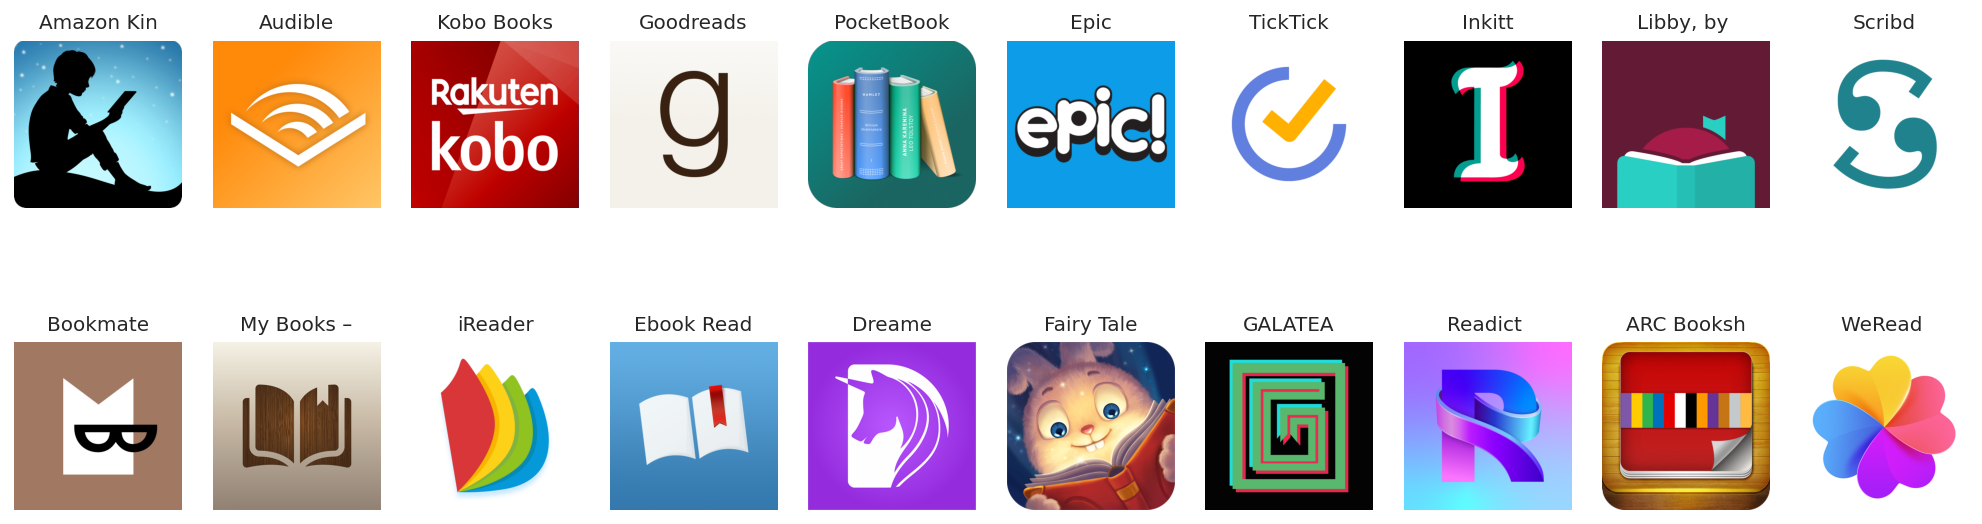

In [ ]:
# we will create a list which will have all the data for the app mentioned in
# the previous list
app_infos = []

for ap in tqdm(app_packages):
  # Language of the app is English and country is US
  info = app(ap, lang='en', country='us')
  # We will not consider the 'comments' of the app
  del info['comments']
  # we will add the all data extracted for the app excluding comments
  app_infos.append(info)

# This will help to extract the name of the application
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

# Plot the icons of all the apps along with the names of the applications
fig, axs = plt.subplots(2, len(app_infos)//2, figsize=(14, 5))
for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']),fontsize=10)
  ax.axis('off')
plt.tight_layout()

# Convert the data extracted in form of dataframe 
app_infos_df = pd.DataFrame(app_infos)
# convert the dataframe in form of the CSV file
app_infos_df.to_csv('apps.csv', index=None, header=True)

Print first two rows of the dataset.

In [ ]:
app_infos_df.head(n=2)

,title,description,descriptionHTML,summary,installs,minInstalls,score,ratings,reviews,histogram,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,Amazon Kindle,"READ ANYTIME, ANYWHERE\r\nOn the bus, on your ...","READ ANYTIME, ANYWHERE<br>On the bus, on your ...","Your library in your pocket. Anytime, anywhere.","100,000,000+",100000000,4.655610,2529745,143541,"[92893, 26859, 65154, 288738, 2056089]",...,None,True,True,"Jun 28, 2010",1656033612,Varies with device,Several experience improvements and bug fixes.,Several experience improvements and bug fixes.,com.amazon.kindle,https://play.google.com/store/apps/details?id=...
1,Audible: audiobooks & podcasts,Your shelf might have run out of space for you...,Your shelf might have run out of space for you...,Enjoy original stories & podcasts. Listen to t...,"100,000,000+",100000000,4.600616,1362513,209819,"[66757, 23566, 33028, 140372, 1098783]",...,None,True,True,"Aug 12, 2010",1656710016,3.29.0,Bug fixes:\r\n• Content no longer paused durin...,Bug fixes:<br>• Content no longer paused durin...,com.audible.application,https://play.google.com/store/apps/details?id=...


Extracting the reviews of the apps using the code below.

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en', #get english reviews
        country='us', # get US based reviews
        sort=sort_order, #sort according to the most relevant and new reviews
        count= 200 if score == 3 else 100, 
        filter_score_with=score
      )
      for r in rvs:
        # sort reviews by order
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

# convert data to a dataframe and then convert it into CSV format
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

100%|██████████| 20/20 [01:07<00:00,  3.40s/it]


In [ ]:
app_reviews_df.head(n=2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,a763b598-1c92-4b7d-a244-7b393b12f4e7,Celisse Sellars,https://play-lh.googleusercontent.com/a-/AOh14...,"USED TO BE my favorite. Since the update, the ...",1,30,8.61.0.100(1.3.262439.0),2022-07-02 21:32:33,None,NaT,most_relevant,com.amazon.kindle
1,ff65d388-9a6f-405d-af27-fc6a01779895,Emily Atnip,https://play-lh.googleusercontent.com/a-/AOh14...,Super annoyed with this update! Already irrita...,1,9,8.61.0.100(1.3.262439.0),2022-07-03 12:35:42,None,NaT,most_relevant,com.amazon.kindle


In [ ]:
# only extract the following columns dataset about app description
final_dataset = app_infos_df[["title","description","summary","appId",
                              "installs","score","ratings","reviews"]]

# To avoid displaying any warnings (if any)
import warnings
warnings.filterwarnings('ignore')

# Next we will extract these three columns information from reviews dataset
temp_dict = {"Review_contents":[],"thumbsUpCount":[],"score":[]}
all_app_IDs = final_dataset["appId"]
for i in all_app_IDs:
  temp_data = app_reviews_df[app_reviews_df["appId"]==i]
  temp_dict["Review_contents"].append(list(temp_data.content))
  temp_dict["thumbsUpCount"].append(list(temp_data.thumbsUpCount))
  temp_dict["score"].append(list(temp_data.score))

# We will add the filtered reviews dataset to the filtered app dataset
final_dataset["Review_contents"] = temp_dict["Review_contents"]
final_dataset["thumbsUpCount"] = temp_dict["thumbsUpCount"]
final_dataset["score"] = temp_dict["score"]

# convert dataset to a CSV file
final_dataset.to_csv("final_app_scraped_dataset.csv")

In [ ]:
final_dataset.head(n=2)

,title,description,summary,appId,installs,score,ratings,reviews,Review_contents,thumbsUpCount
0,Amazon Kindle,"READ ANYTIME, ANYWHERE\r\nOn the bus, on your ...","Your library in your pocket. Anytime, anywhere.",com.amazon.kindle,"100,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2529745,143541,"[USED TO BE my favorite. Since the update, the...","[30, 9, 206, 272, 292, 46, 171, 33, 42, 6, 5, ..."
1,Audible: audiobooks & podcasts,Your shelf might have run out of space for you...,Enjoy original stories & podcasts. Listen to t...,com.audible.application,"100,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1362513,209819,[When I tried to use the app to purchase a sub...,"[6, 29, 12, 16, 30, 17, 653, 76, 71, 220, 51, ..."


# Step 2 and 3 - Exploratory Data Analysis and Data Visualization

To avoid running the code again and again, I added the dataset the dropbox so that we can extract the final file using the `!wget` command and directly paste the link to get the final data directly!

In [ ]:
%%capture
!wget https://www.dropbox.com/s/cq45r72myksybhd/final_app_scraped_dataset.csv?dl=0

Import necesary modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load and display the dataset.

In [ ]:
data = pd.read_csv("final_app_scraped_dataset.csv?dl=0")
print("Shape of Dataset : ",data.shape)
data.head(n=2)

Shape of Dataset :  (20, 11)


,Unnamed: 0,title,description,summary,appId,installs,score,ratings,reviews,Review_contents,thumbsUpCount
0,0,Amazon Kindle,"READ ANYTIME, ANYWHERE\r\nOn the bus, on your ...","Your library in your pocket. Anytime, anywhere.",com.amazon.kindle,"100,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2523313,143250,"[""Agree with all the reviewers who say that th...","[0, 106, 245, 15, 150, 15, 32, 6, 75, 1, 0, 4,..."
1,1,Audible: audiobooks & podcasts,Your shelf might have run out of space for you...,Enjoy original stories & podcasts. Listen to t...,com.audible.application,"100,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1361301,209635,"[""Use it pretty much all day, every day. Since...","[603, 67, 68, 978, 48, 19, 219, 2, 11, 0, 28, ..."


In [ ]:
%%capture
!pip install nltk
!pip install contractions

import contractions
import re

import nltk
nltk.download('all')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()

In [ ]:
def apply_NLP(x):
  x = contractions.fix(x)
  x = x.lower()
  x = re.sub(r'\d+','',x)
  x = re.sub(r'[^\w\s]', '', x)
  x = word_tokenize(x)
  x = [w for w in x if not w in stopwords.words()]
  x = [ lemma.lemmatize(w, pos = "v") for w in x]
  x = [ lemma.lemmatize(w, pos = "n") for w in x]
  for i in x:
    if(len(i)==1):
      x.remove(i)
  x = ' '.join(x)
  return x

In [ ]:
# Warning! : This cell took over 1 hour

data['description'] = data['description'].apply(apply_NLP)
data['summary'] = data['summary'].apply(apply_NLP)

NLP_applied_reviews = []
for i in range(data.shape[0]):
  #print("Working on....",data['title'][i],"\n")
  temp = data['Review_contents'][i]
  temp = temp.strip('][').split('", ')
  final_list=[]
  r_no = 1
  for j in temp:
    #print("\t\t Review Number ",r_no)
    final_list.append(apply_NLP(j))
    r_no+=1
  NLP_applied_reviews.append(final_list)

data["Review_contents"] = NLP_applied_reviews

In [ ]:
data.head(n=2)

,Unnamed: 0,title,description,summary,appId,installs,score,ratings,reviews,Review_contents,thumbsUpCount
0,0,Amazon Kindle,read anytime bus break bednever read kindle ap...,library pocket anytime,com.amazon.kindle,"100,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2523313,143250,[agree reviewer app jump backwards page alert ...,"[0, 106, 245, 15, 150, 15, 32, 6, 75, 1, 0, 4,..."
1,1,Audible: audiobooks & podcasts,shelf run space book audible library endless f...,enjoy original story podcast listen thriller e...,com.audible.application,"100,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1361301,209635,[pretty day day update app unstable close paus...,"[603, 67, 68, 978, 48, 19, 219, 2, 11, 0, 28, ..."


In [ ]:
# convert dataset to a CSV file
data.to_csv("final_app_NLP_dataset.csv")

In [ ]:
%%capture
!wget https://www.dropbox.com/s/cwumieag7d38xgu/final_app_NLP_dataset.csv?dl=0

In [ ]:
NLP_data = pd.read_csv("final_app_NLP_dataset.csv?dl=0")
NLP_data = NLP_data.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)
NLP_data.head()

,title,description,summary,appId,installs,score,ratings,reviews,Review_contents,thumbsUpCount
0,Amazon Kindle,read anytime bus break bednever read kindle ap...,library pocket anytime,com.amazon.kindle,"100,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2523313,143250,['agree reviewer app jump backwards page alert...,"[0, 106, 245, 15, 150, 15, 32, 6, 75, 1, 0, 4,..."
1,Audible: audiobooks & podcasts,shelf run space book audible library endless f...,enjoy original story podcast listen thriller e...,com.audible.application,"100,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1361301,209635,['pretty day day update app unstable close pau...,"[603, 67, 68, 978, 48, 19, 219, 2, 11, 0, 28, ..."
2,Kobo Books - eBooks & Audiobooks,join million booklover globe access portable r...,home ebooks audiobooks,com.kobobooks.android,"10,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",276674,20600,['kobo copy audible terrible customer service ...,"[7, 15, 18, 8, 8, 3, 7, 22, 8, 0, 2, 10, 4, 4,..."
3,Goodreads,find share book love goodreads world largest s...,find share book friend million reader,com.goodreads,"10,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",131978,8978,['amazon redheaded step child app barely usabl...,"[69, 90, 57, 81, 47, 42, 7, 10, 67, 2, 33, 31,..."
4,PocketBook reader - any books,pocketbook reader free app read econtent book ...,read pdf epub djvu fb chm cbr mobi mp mb azw,com.obreey.reader,"5,000,000+","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",81744,2130,['app start give access view edit delete file ...,"[33, 6, 15, 3, 6, 30, 0, 5, 3, 10, 8, 4, 9, 3,..."


We will look at some initial Plots and try to understand the dataset.

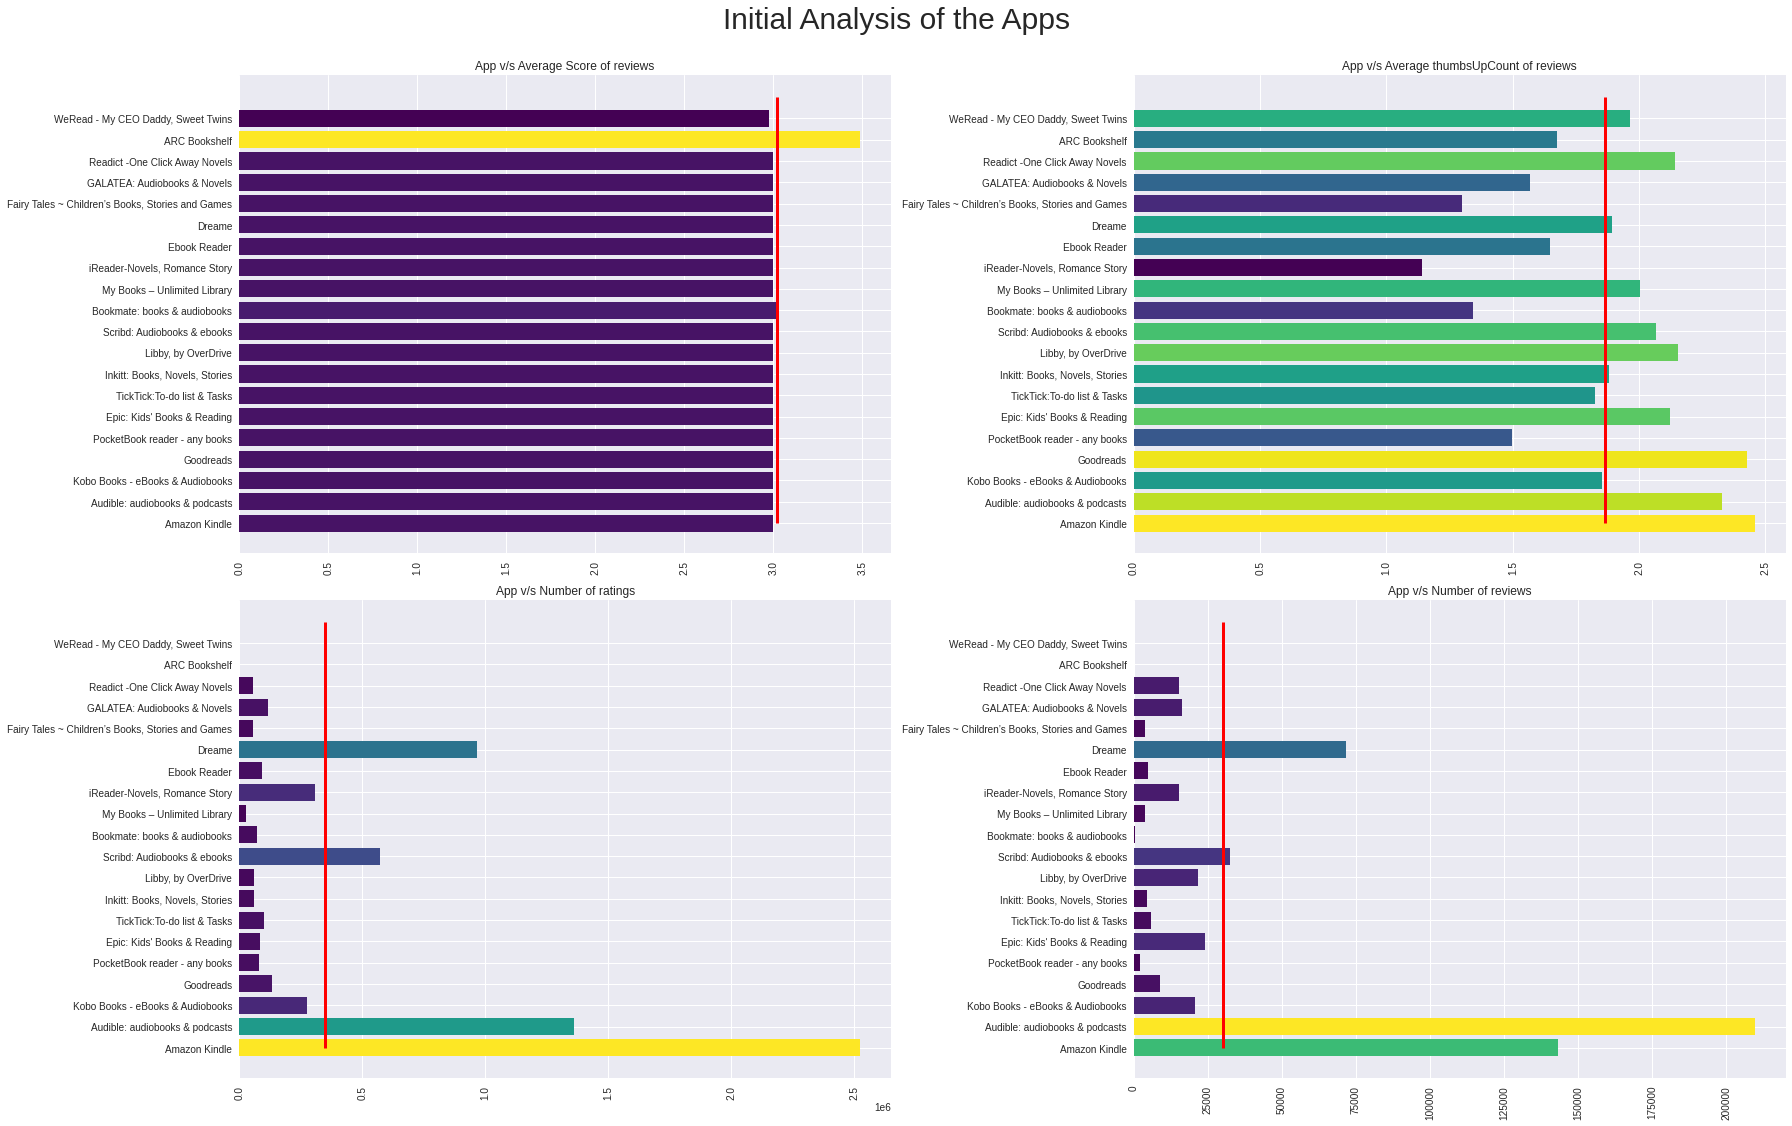

In [ ]:
plt.style.use('seaborn')
x_values = data['title']
plt.figure(figsize=(25,15),facecolor='w')

plt.subplot(2,2,1)
y_values = []
for i in range(len(data['score'])):
  temp = [int(j) for j in list(data["score"][i]) if j.isdigit()]
  y_values.append(np.sum(temp)/len(temp))
NLP_data['score'] = y_values
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(x_values,y_values,color=my_cmap(rescale(y_values)))
plt.xticks(rotation=90)
plt.vlines(np.average(y_values),0,20,color='red',linewidth=3)
plt.title("App v/s Average Score of reviews")

plt.subplot(2,2,2)
y_values = []
for i in range(len(data['thumbsUpCount'])):
  temp = [int(j) for j in list(data["thumbsUpCount"][i]) if j.isdigit()]
  y_values.append(np.sum(temp)/len(temp))
NLP_data['thumbsUpCount'] = y_values
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(x_values,y_values,color=my_cmap(rescale(y_values)))
plt.vlines(np.average(y_values),0,20,color='red',linewidth=3)
plt.xticks(rotation=90)
plt.title("App v/s Average thumbsUpCount of reviews")

plt.subplot(2,2,3)
y_values = data['ratings']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(x_values,y_values,color=my_cmap(rescale(y_values)))
plt.vlines(np.average(y_values),0,20,color='red',linewidth=3)
plt.xticks(rotation=90)
plt.title("App v/s Number of ratings")

plt.subplot(2,2,4)
y_values = data['reviews']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(x_values,y_values,color=my_cmap(rescale(y_values)))
plt.vlines(np.average(y_values),0,20,color='red',linewidth=3)
plt.xticks(rotation=90)
plt.title("App v/s Number of reviews")

plt.tight_layout()
plt.suptitle('Initial Analysis of the Apps', fontsize=30,y=1.04)
plt.savefig("Initial_Visualization.png",dpi=200)
plt.show()

From the plots we can conclude the following things:

1. ARC Bookshelf has the maximum avg score for the reviews.
2. The average thumbsUpCount of multiple apps exceeed the overall average count.
3. Four apps exceed the overall average number of ratings.
4. Three apps exceed the overall average number of reviews.

In [ ]:
NLP_data

,title,description,summary,appId,installs,score,ratings,reviews,Review_contents,thumbsUpCount
0,Amazon Kindle,read anytime bus break bednever read kindle ap...,library pocket anytime,com.amazon.kindle,"100,000,000+",3.000000,2523313,143250,['agree reviewer app jump backwards page alert...,2.456820
1,Audible: audiobooks & podcasts,shelf run space book audible library endless f...,enjoy original story podcast listen thriller e...,com.audible.application,"100,000,000+",3.000000,1361301,209635,['pretty day day update app unstable close pau...,2.328172
2,Kobo Books - eBooks & Audiobooks,join million booklover globe access portable r...,home ebooks audiobooks,com.kobobooks.android,"10,000,000+",3.000000,276674,20600,['kobo copy audible terrible customer service ...,1.854004
3,Goodreads,find share book love goodreads world largest s...,find share book friend million reader,com.goodreads,"10,000,000+",3.000000,131978,8978,['amazon redheaded step child app barely usabl...,2.425798
4,PocketBook reader - any books,pocketbook reader free app read econtent book ...,read pdf epub djvu fb chm cbr mobi mp mb azw,com.obreey.reader,"5,000,000+",3.000000,81744,2130,['app start give access view edit delete file ...,1.496698
5,Epic: Kids' Books & Reading,lead digital read platform epic offer fun safe...,learn readtome book ebooks story video grade s...,com.getepic.Epic,"5,000,000+",3.000000,83347,24185,['wonderful app daughter love upgrade unlimite...,2.120788
6,TickTick:To-do list & Tasks,bgreat list app android deviceb verge bthe app...,time management planner reminder calendar habi...,com.ticktick.task,"5,000,000+",3.000000,100546,5869,['great app lot feature subscribe full version...,1.826910
7,"Inkitt: Books, Novels, Stories",find thousand fiction book inkitt app read fre...,discover free book novel scifi fiction fantasy...,com.inkitt.android.hermione,"1,000,000+",3.000000,61886,4359,['frustrate app page cut sentence chapter pas ...,1.882667
8,"Libby, by OverDrive",world local library offer million ebooks audio...,discover ebooks audiobooks magazine local library,com.overdrive.mobile.android.libby,"5,000,000+",3.000000,58887,21781,['app disappointment harder navigate overdrive...,2.151980
9,Scribd: Audiobooks & ebooks,join million reader turn scribds digital libra...,scribd read subscription audiobooks book sheet...,com.scribd.app.reader0,"10,000,000+",3.000000,573772,32368,['love selection available read material hate ...,2.068556


In [ ]:
NLP_data.to_csv("Sent_ready_app_data.csv")

# Step 4 - Sentiment Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%%capture
!wget https://www.dropbox.com/s/vc04fj8eirnowr6/Sent_ready_app_data.csv?dl=0

In [ ]:
Sent_data = pd.read_csv("Sent_ready_app_data.csv?dl=0")
Sent_data = Sent_data[["title","description","summary","score","Review_contents","thumbsUpCount"]]
print("Shape of dataset : ",Sent_data.shape)
Sent_data.head()

Shape of dataset :  (20, 6)


,title,description,summary,score,Review_contents,thumbsUpCount
0,Amazon Kindle,read anytime bus break bednever read kindle ap...,library pocket anytime,3.0,['agree reviewer app jump backwards page alert...,2.456820
1,Audible: audiobooks & podcasts,shelf run space book audible library endless f...,enjoy original story podcast listen thriller e...,3.0,['pretty day day update app unstable close pau...,2.328172
2,Kobo Books - eBooks & Audiobooks,join million booklover globe access portable r...,home ebooks audiobooks,3.0,['kobo copy audible terrible customer service ...,1.854004
3,Goodreads,find share book love goodreads world largest s...,find share book friend million reader,3.0,['amazon redheaded step child app barely usabl...,2.425798
4,PocketBook reader - any books,pocketbook reader free app read econtent book ...,read pdf epub djvu fb chm cbr mobi mp mb azw,3.0,['app start give access view edit delete file ...,1.496698


In [ ]:
%%capture
!pip install -q transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
desc_text = list(Sent_data['description'])
desc_sent_results = sentiment_pipeline(desc_text)

sentiment_labels = []
sentiment_scores = []

for i in desc_sent_results:
  sentiment_labels.append(i['label'])
  sentiment_scores.append(i['score'])

Sent_data['Desc_Sent_Label'] = sentiment_labels
Sent_data['Desc_Sent_Score'] = sentiment_scores

Sent_data.head(n=2)

,title,description,summary,score,Review_contents,thumbsUpCount,Desc_Sent_Label,Desc_Sent_Score
0,Amazon Kindle,read anytime bus break bednever read kindle ap...,library pocket anytime,3.0,['agree reviewer app jump backwards page alert...,2.456820,NEGATIVE,0.783236
1,Audible: audiobooks & podcasts,shelf run space book audible library endless f...,enjoy original story podcast listen thriller e...,3.0,['pretty day day update app unstable close pau...,2.328172,NEGATIVE,0.957021


In [ ]:
summ_text = list(Sent_data['summary'])
summ_sent_results = sentiment_pipeline(summ_text)

sentiment_labels = []
sentiment_scores = []

for i in summ_sent_results:
  sentiment_labels.append(i['label'])
  sentiment_scores.append(i['score'])

Sent_data['Summ_Sent_Label'] = sentiment_labels
Sent_data['Summ_Sent_Score'] = sentiment_scores

Sent_data.head(n=2)

,title,description,summary,score,Review_contents,thumbsUpCount,Desc_Sent_Label,Desc_Sent_Score,Summ_Sent_Label,Summ_Sent_Score
0,Amazon Kindle,read anytime bus break bednever read kindle ap...,library pocket anytime,3.0,['agree reviewer app jump backwards page alert...,2.456820,NEGATIVE,0.783236,POSITIVE,0.769852
1,Audible: audiobooks & podcasts,shelf run space book audible library endless f...,enjoy original story podcast listen thriller e...,3.0,['pretty day day update app unstable close pau...,2.328172,NEGATIVE,0.957021,POSITIVE,0.998847


In [ ]:
sentiment_labels = []
sentiment_scores = []
Reviews_text = list(Sent_data['Review_contents'])
for i in Reviews_text:
  i = list(i[:1000])
  Reviews_sent_results = sentiment_pipeline(i)
  temp_labels = []
  temp_scores = []
  for j in Reviews_sent_results:
    temp_labels.append(j['label'])
    temp_scores.append(j['score'])
  sentiment_labels.append(temp_labels)
  sentiment_scores.append(temp_scores)

Sent_data['Reviews_Sent_Label'] = sentiment_labels
Sent_data['Reviews_Sent_Score'] = sentiment_scores
Sent_data.head(n=2)

,title,description,summary,score,Review_contents,thumbsUpCount,Desc_Sent_Label,Desc_Sent_Score,Summ_Sent_Label,Summ_Sent_Score,Reviews_Sent_Label,Reviews_Sent_Score
0,Amazon Kindle,read anytime bus break bednever read kindle ap...,library pocket anytime,3.0,['agree reviewer app jump backwards page alert...,2.456820,NEGATIVE,0.783236,POSITIVE,0.769852,"[POSITIVE, POSITIVE, POSITIVE, POSITIVE, POSIT...","[0.7380423545837402, 0.9618721008300781, 0.987..."
1,Audible: audiobooks & podcasts,shelf run space book audible library endless f...,enjoy original story podcast listen thriller e...,3.0,['pretty day day update app unstable close pau...,2.328172,NEGATIVE,0.957021,POSITIVE,0.998847,"[POSITIVE, POSITIVE, NEGATIVE, POSITIVE, POSIT...","[0.7380423545837402, 0.9618721008300781, 0.595..."


In [ ]:
Sent_data.to_csv("After_Sent_ready_app_data.csv")

In [ ]:
labels = list(Sent_data["title"])
pos_count = []
neg_count = []
for i in Sent_data["Reviews_Sent_Label"]:
  pos,neg=0,0
  for j in i:
    if(j=="POSITIVE"):
      pos+=1
    elif(j=="NEGATIVE"):
      neg+=1
  pos_count.append(pos)
  neg_count.append(neg)

print("Labels : \t",labels)
print("Positive : \t",pos_count)
print("Negative : \t",neg_count)

Labels : 	 ['Amazon Kindle', 'Audible: audiobooks & podcasts', 'Kobo Books - eBooks & Audiobooks', 'Goodreads', 'PocketBook reader - any books', "Epic: Kids' Books & Reading", 'TickTick:To-do list & Tasks', 'Inkitt: Books, Novels, Stories', 'Libby, by OverDrive', 'Scribd: Audiobooks & ebooks', 'Bookmate: books & audiobooks', 'My Books – Unlimited Library', 'iReader-Novels, Romance Story', 'Ebook Reader', 'Dreame', 'Fairy Tales ~ Children’s Books, Stories and Games', 'GALATEA: Audiobooks & Novels', 'Readict -One Click Away Novels', 'ARC Bookshelf', 'WeRead - My CEO Daddy, Sweet Twins']
Positive : 	 [868, 867, 891, 872, 875, 876, 859, 868, 891, 914, 883, 895, 856, 890, 875, 882, 859, 872, 904, 885]
Negative : 	 [132, 133, 109, 128, 125, 124, 141, 132, 109, 86, 117, 105, 144, 110, 125, 118, 141, 128, 96, 115]


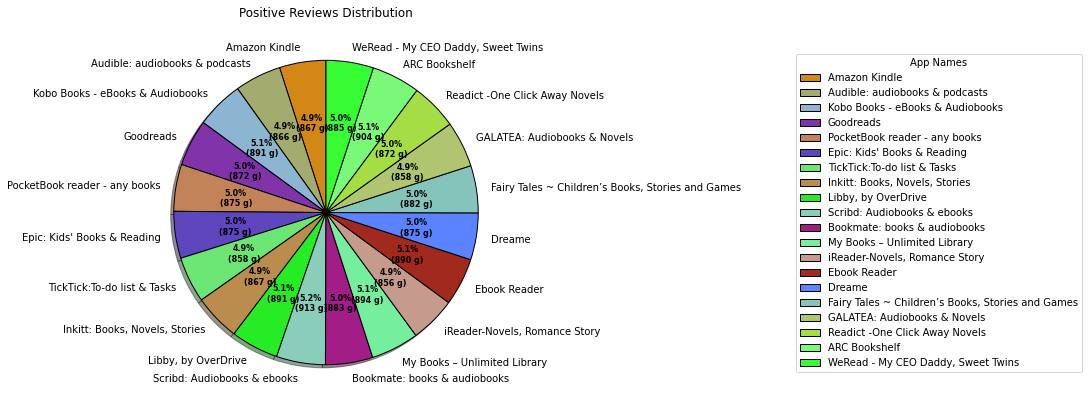

In [ ]:
import random

wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
  absolute = int(pct / 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)
number_of_colors = 20
pie_colors = []
for i in range(number_of_colors):
  temp = "#"+''.join([random.choice('123456789ABCDEF') for j in range(6)])
  if(temp!="#FFFFFF" and temp!="#000000" and temp not in pie_colors):
    pie_colors.append(temp)
fig, ax = plt.subplots(figsize =(30,7))
wedges, texts, autotexts = ax.pie(pos_count,
                autopct = lambda pct: func(pct, pos_count),
                labels = labels,
                shadow = True,
                colors=pie_colors,
                startangle = 90,
                wedgeprops = wp,
                textprops = dict(color ="black"))
ax.legend(wedges, labels,
    title ="App Names",
    loc ="center right",
    bbox_to_anchor =(2, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Positive Reviews Distribution")

plt.show()

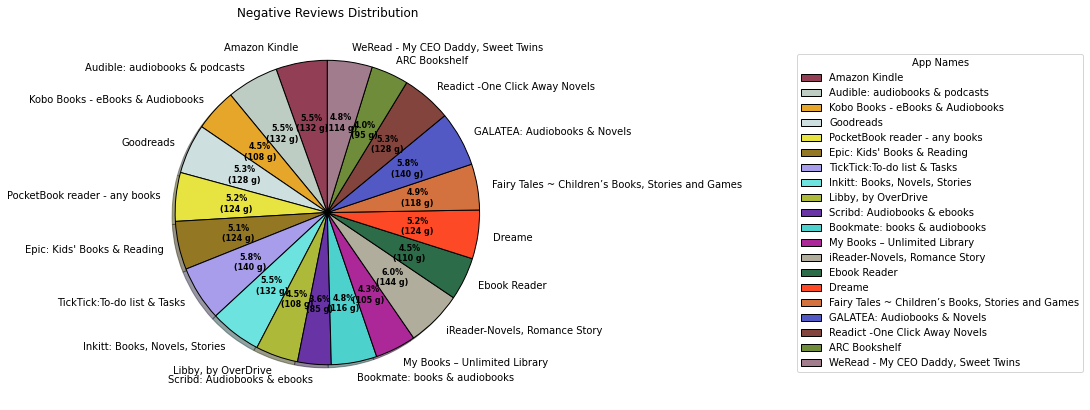

In [ ]:
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
  absolute = int(pct / 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)
number_of_colors = 20
pie_colors = []
for i in range(number_of_colors):
  temp = "#"+''.join([random.choice('123456789ABCDEF') for j in range(6)])
  if(temp!="#FFFFFF" and temp!="#000000" and temp not in pie_colors):
    pie_colors.append(temp)
fig, ax = plt.subplots(figsize =(30,7))
wedges, texts, autotexts = ax.pie(neg_count,
                autopct = lambda pct: func(pct, neg_count),
                labels = labels,
                shadow = True,
                colors=pie_colors,
                startangle = 90,
                wedgeprops = wp,
                textprops = dict(color ="black"))
ax.legend(wedges, labels,
    title ="App Names",
    loc ="right",
    bbox_to_anchor =(2, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Negative Reviews Distribution")

plt.show()